## Second-order systems     
(C) 2019 by Wawrzyniec L. Dobrucki, Ph.D. 

**Second-order system** is a more sophisticated example of a linear system defined by the ordinary differential equation (ODE) shown below:   

$a_0 y(t) + a_1 \dfrac{\delta y}{\delta t} + ... + a_n \dfrac{\delta^n y}{\delta t^{n}} = b_0 x(t) + b_1 \dfrac{\delta x}{\delta t} + ... + b_m \dfrac{\delta^m x}{\delta t^m}$

In second-order system, the coefficients $n = 2, m = 0$ which simplifies the ODE to the following form:   

$a_2 \dfrac{\delta^2 y}{\delta t^2} + a_1 \dfrac{\delta y}{\delta t} + a_0 y(t) = b_0 x(t)$   
   
This ODE can be convered to _Laplace_ domain using Laplace transform:   

$a_2S^2Y(S) + a_1SY(S) + a_0Y(S) = b_0 X(S)$   

Using above equation, let's define the transfer function $H(S)$:   

$H(S) = \dfrac{Y(S)}{X(S)} = \dfrac{b_0}{a_2S^2 + a_1S +a_0} = \dfrac{b_0/a_0}{\frac{a_2}{a_0}S^2 + \frac{a_1}{a_0}S + 1}$   

To simplify this equation, let's define _static sensitivity_ $K$, _undamped natural frequency_ $\omega_n$ (rad/s) and _damping ratio_ $\zeta$ (dimensionless):   

$K = \dfrac{b_0}{a_0} \hspace{0.3in} \omega_n = \sqrt{a_0/a_2} \hspace{0.3in} \zeta = \dfrac{a_1}{2\sqrt{a_0a_2}}$   

Therefore: $\hspace{0.3in} H(S) = \dfrac{K}{\frac{S^2}{{\omega_n}^2} + \frac{2\zeta S}{\omega_n} + 1}$

Let's define a representative second-order system and plot it's responses to step and sinusoidal inputs.

In [27]:
%matplotlib inline
# standard imports
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [28]:
# sample system's parameters
K     = 2.0  # gain
tau   = 1.0  # time constant
zeta  = 0.25 # damping factor

In [29]:
# definition of the system's transfer function
num = [K]
den = [tau**2,2*zeta*tau,1]
sys2 = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys2)

### System's response to step input function
First, let's evaluate second-order system's response to step input function.    

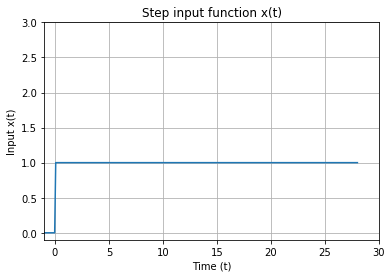

In [30]:
# definition of the piecewise input function (step input function)
t = np.linspace (-1, 28, 300)
x = np.piecewise(t, [t<0, t>=0], [0, 1])
plt.plot(t, x)
plt.grid(True)
plt.title('Step input function x(t)')
plt.xlabel('Time (t)')
plt.ylabel('Input x(t)')
plt.ylim(-0.1, 3)
plt.xlim(-1,30)
plt.show()

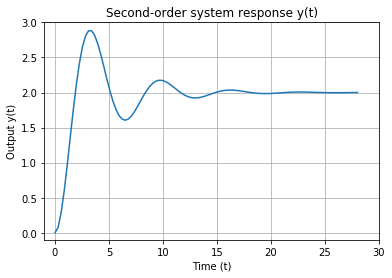

In [31]:
# Plotting system's response to step input function
plt.plot(t1, y1) 
    
plt.grid(True)
plt.title('Second-order system response y(t)')
plt.xlabel('Time (t)')
plt.ylabel('Output y(t)')
plt.ylim(-0.1, 3)
plt.xlim(-1,30)
plt.show()

### Second-order system's behaviour 
There are three possible system behaviours depending on damping ratio parameter ($\zeta$):   

1. if $\zeta > 1$ then the system is overdamped   
2. if $\zeta = 1$ then the system is critically damped   
3. if $\zeta < 1$ then the system is underdamped (or in resonance)   

Let's plot second-order response for different $\zeta$ parameter:

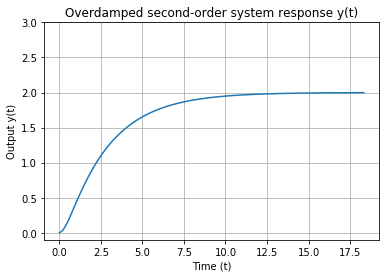

In [32]:
# Overdamped system (zeta = 1.5)
num = [K]
zeta = 1.5
den = [tau**2,2*zeta*tau,1]
sys2_overdamped = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys2_overdamped)

plt.plot(t1, y1) 
plt.grid(True)
plt.title('Overdamped second-order system response y(t)')
plt.xlabel('Time (t)')
plt.ylabel('Output y(t)')
plt.ylim(-0.1, 3)
plt.show()

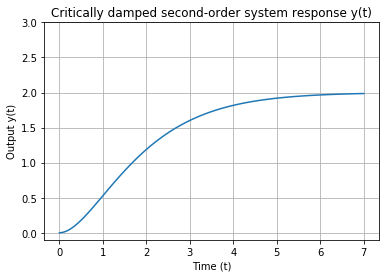

In [33]:
# Critically damped system (zeta = 1)
num = [K]
zeta = 1
den = [tau**2,2*zeta*tau,1]
sys2_critdamped = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys2_critdamped)

plt.plot(t1, y1) 
plt.grid(True)
plt.title('Critically damped second-order system response y(t)')
plt.xlabel('Time (t)')
plt.ylabel('Output y(t)')
plt.ylim(-0.1, 3)
plt.show()

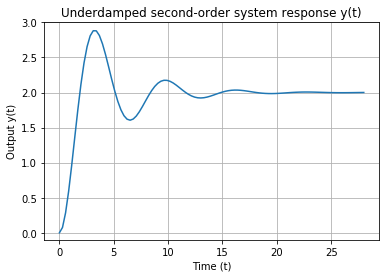

In [34]:
# Underdamped system (zeta = 0.25)
num = [K]
zeta = 0.25
den = [tau**2,2*zeta*tau,1]
sys2_underdamped = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys2_underdamped)

plt.plot(t1, y1) 
plt.grid(True)
plt.title('Underdamped second-order system response y(t)')
plt.xlabel('Time (t)')
plt.ylabel('Output y(t)')
plt.ylim(-0.1, 3)
plt.show()

### Second-order system: Bode plots of magnitude and phase
A Bode plot is a useful tool that shows the gain (magnitude) and phase response of a given LTI system for different frequencies. Typically, the frequency of the bode plots are plotted against a logarithmic frequency axis.   
Let's define a second-order system and graph Bode plots for the gain (magnitude) and phase.

In [35]:
# we will use an underdamped system defined previously
w, mag, phase = signal.bode(sys2_underdamped)

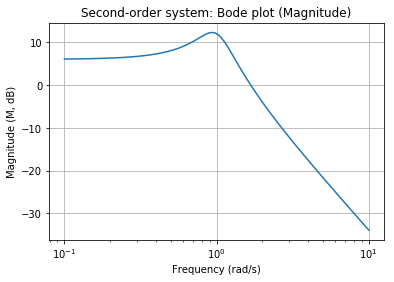

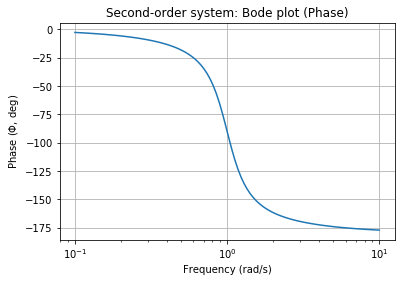

In [36]:
plt.figure()
plt.semilogx(w, mag)
plt.title('Second-order system: Bode plot (Magnitude)')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude (M, dB)')
plt.grid(True)
plt.figure()
plt.semilogx(w, phase)
plt.title('Second-order system: Bode plot (Phase)')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Phase ($\Phi$, deg)')
plt.grid(True)
plt.show()

### Second-order system: Interactive plots
With the interactive plots shown below, you can change parameters of second order system (K - static sensitivity, $\tau$ (tau) - time coeficient, and $\zeta$ (zeta) - damping ratio) and observe system's output in time domain, and bode plots for magnitude and phase.

 $\hspace{0.3in} H(S) = \dfrac{K}{\tau^2 + 2\zeta \tau + 1}$

In [40]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

def second_order(K=1, tau=1, zeta=1):
    num = [K]
    den = [tau**2,2*zeta*tau,1]
    sys2 = signal.TransferFunction(num,den)
    t1,y1 = signal.step(sys2)
    # output plot
    plt.figure()
    plt.plot(t1, y1) 
    plt.grid(True)
    plt.title('Underdamped second-order system response y(t)')
    plt.xlabel('Time (t)')
    plt.ylabel('Output y(t)')
    plt.ylim(-0.1, 3)
    # bode plots
    w, mag, phase = signal.bode(sys2)
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.semilogx(w, mag)
    ax1.set_title('Bode plot (Magnitude)')
    ax1.set_xlabel('Frequency (rad/s)')
    ax1.set_ylabel('Magnitude (M, dB)')
    ax1.grid(True)
    ax2.semilogx(w, phase)
    ax2.set_title('Bode plot (Phase)')
    ax2.set_xlabel('Frequency (rad/s)')
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()
    ax2.set_ylabel('Phase ($\Phi$, deg)')
    ax2.grid(True)
    plt.show()

interactive_plot = interactive(second_order, K=(0, 5.0, 0.5), tau=(0, 3, 1), zeta=(0.1, 2, 0.1))
#output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='K', max=5.0, step=0.5), IntSlider(value=1, descripti…